<a href="https://colab.research.google.com/github/kankeinai/Computational_physics/blob/main/a08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PHYS270 Assigment 8: Discrete Fourier Transform
Student name: Begantsova Milana

---
##Abstract
In this programming assignmnent we are going to get introduced to discrere fourier tranformation. We will study transformation of one particular gaussian function and its derivative. At first we will derive analytical formulas for fourier transformation. Then we try to approximate those functions using python library. We will use different number of data points to conclude how $N$ affects the quality of discretization of functions. And confirm the validity of python library by checking the mathematical feature of our gaussian function. The results of this work are the graphs of $G(\omega)$, $H(\omega)$ versus $\omega$ calculate with both methods. And also the graps of discrepancy versus quantity of data points. The experiment has shown that with greater number of data point we can achief better discretization and fourier transformation.

---
##Introduction

Discrete fourier transformation have many useful applications, esprecially in sound editing. With FFT we can decompose any complex sound to composite frequencies. Just imagine that we have a song with some noice. With FFT we can distinguish frequencies of a song and that noice. Then we can delete frequencies of it and apply inverse fourier transformation. The result is our sound without any noice (ideally). The FFT application is not limited only in using sound edditing but for the purposes of this programming assignmnet, this example is relevant.

The aim of this experiment is too study how the discrete fourier transformation depends on the number of data points (discretization of functions). 

From the lectures we know the formula for Fourier transformation and its inverse. We will apply them in the Part – 1 to derive analytical formulas for some functions $G(\omega)$ and $H(\omega)$. The values of these function we will consider ideal ones. In the Part – 2, we will try to approximate the same functions with `scipy.fft` package and draw the graphs of these function to visually see the difference with analytical solution. In the Part – 3, I will judge how the accuracy of python library depends on number of data points $N$. And in the last part I will try to return to original value of some function using the results of previous parts. 

My hypothesis is that with greater number of data points the quality of fourier transformation will increase.


---
##Methods

In this programming assignment we will use two methods to compute fourier transformation and graphical method to represent visually our results. 

At first we will derive analytically formulas for $G(\omega)$ and $H(\omega)$ using wolfram alpha sofware. The advantage of this method is that it does'not require us to include any additional libraries. However, these formulas are limited in use since they are applicable to our functions. We also calculate fourier transfomation with `scipy.fft` library. The advantages are that it produces solution fast, can be used with different functions, have built-in normalization. `scipy.fft` also can generate frequencies ranges, find inverse fourier transforation, shift frequencies and other useful things. But the downside of such functions is that we don't know what and how they do exactly. We don't have any control under what is going on and cannot debug it directly if something is going on. 

When we have finished with generating values for $G(\omega)$ and $H(\omega)$, we will judge the total discrepancy for different value of $N$. The discrepancy of a solution, I will judge by applying next formula:
$$error = \frac{1}{n}\sum^n_{k=1}|F(\omega)-F'(\omega)|$$
where $F(\omega)$ is descretized fourier transform calculated analytically and $F'(\omega)$ is descretized fourier transform calculated with `scipy.fft`. The downside of using this formula is that real and imaginary components can conpensate each other and even if visualization shows that there is a huge difference, the value of error can be still small. But this formula will be helpful in judging on avarege how functions are similar. 

---
##Description

### Part 1 – Formulas derivation and functions discretization

In this programming assignment we are going to investigate Discrete Fourier transform. As it has been described in the "Methods" section we will do it in two ways: using analytical formulas and specialized python library (scipy). At first let me import all needed librarier and functions to start the experiment: 

In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftshift, ifftshift, ifft, fftfreq

We will consider a gaussian function of time $g(t)$:
$$g(t) = e^{-(t-\tau)^2}$$
where $\tau$ is any constant.

And we will also need a first derivative of $g(t)$. Let me call it $h(t)$:
$$h(t)=-2(t-\tau)e^{-(t-\tau)^2}$$
The formula for $h(t)$ can be derived using calculus.

In this experiment we will set $\tau=3$ and discretize function $g(t)$ and $h(t)$ with different number of sample points $N$. We will study how this number affects discrepancy of fourier transform.

In [ ]:
N = [4, 8, 16, 32, 64] # we will do fourier transform with different values of N
a = 5 # we will need it later on
tau = 3 # the coefficient in g(t) formula

Lets write function which will generate values for discretized $g(t), \ h(t)$. We will generate $N$ values of $t$ which should be evenly distributed on the interval of $[-a+\tau,a+\tau]$. To evenly distribute those values, I will use function `np.linspace()`:

In [ ]:
def functions(tau, a, N):
  g, h, t = [], [], []
  for n in N:
    t.append(np.linspace(-a+tau, a+tau, n)) # generate n values of t
    g.append(np.exp(-(t[-1]-tau)**2)) # g(t) formula
    h.append(-2*(t[-1]-tau)*g[-1]) # h(t) formula
  return g, h, t # function returns sets of values of g, h, t for all values of N 

In [ ]:
g, h, t = functions(tau, a, N) # store descretized values of g(t), h(t)

The purpose of this experiment is to compute Discretized Furier tranformation, we can do it analytically using next formula [1]:
$$\mathscr{F}_t[f(t)](\omega)=F(\omega) = \int_{-\infty}^{\infty} f(t)e^{-i\omega t}dt$$
The wolfram [2] is able to derive Fourier transform using this formula. We just need to set oscilatory factor equal to -1:
$$\mathscr{F}_t[g(t)](\omega)=G(\omega) = \sqrt{\pi}e^{\frac{-\omega^2}{4}-\omega i\tau}$$
$$\mathscr{F}_t[h(t)](\omega)=H(\omega) = i\omega\sqrt{\pi}e^{\frac{-\omega^2}{4}-\omega i\tau}$$

> Note: the only difference between $G(\omega)$ and $H(\omega)$ is a factor of $i\omega$. We will try later on to prove this fact using python library.

Now, we know have descetized values for $t, g(t), h(t)$, but as you probably have notised $G(\omega)$ and $H(\omega)$ are dependent on $\omega$. So, we should somehow descretize our values for frequency that will cover the needed region. The formula for descretized $\omega$:
$$\omega\in[\frac{-\pi}{\Delta t},\frac{\pi}{\Delta t}]$$
where $\Delta t = \frac{2a}{n}$. It again should be evenly distributed.



In [ ]:
omega = [] # generate descretized frequencies
for n in N:
  dt = 2*a/n
  omega.append(np.linspace(-np.pi/dt , np.pi/dt, n))

We have derived formulas for fourier transform analyticaly and now it is time write a function that will calculate those values for different values of N:

In [ ]:
def fourier_trans(tau, omega):
  G, H = [], []
  for omega_0 in omega:
    G.append(np.sqrt(np.pi)*np.exp(-(omega_0**2)/4-1j*omega_0*tau))
    H.append(G[-1] * 1j*omega_0)
  return G, H

In [ ]:
G_formula, H_formula = fourier_trans(tau, omega)

### Part 2 – Fourier transformation with python library 

We now have values for descretized fourier transform lets assume that they are ideal ones and based on them we will judge the discrepancy of the python function for computing fft. To compute Fourier fast transform I will use fft function from `scipy.fft `library called `fft`. To generate descretized values of $\approx F(\omega)$ we should pass values of needed function and set the `norm="ortho"`. Setting the paratmeter `norm` to this value will normilize values by factor of $\sqrt{N}$, where $N$ is the number of points. We will also need to use function `fftshift` since at the moment our zero frequency component is not at the center:



In [ ]:
G_python, H_python = [], [] # store descretized G(w), H(w) calculated with python library
for g_f, h_f in zip(g, h):
  G_python.append(fftshift(fft(g_f, norm="ortho")))
  H_python.append(fftshift(fft(h_f, norm="ortho")))

To see how well python library generated Discrete Fourier Transform, I will plot the graphs of both real and imaginary components of $G(\omega)$ and $H(\omega)$ calculated in both ways. As I have hypothesized at the beginning, I think that the most accurate result will be shown with $N=64$:

In [ ]:
def graph(data):
  fig, axs = plt.subplots(1,2,figsize=(18,8))
  fig.suptitle(data['title'], fontsize=20) 

  #graph settings
  for ax, label, imag, real in zip(axs, data['label'], data['imag'], data['real']):
    ax.set_title(label)
    ax.set_xlabel(data['xlabel'],  fontsize=15)
    ax.set_ylabel(data['ylabel'],  fontsize=15)
    ax.plot(data['freq'], imag, c='r', label = 'Imaginary component')
    ax.plot(data['freq'], real, c='b', label = 'Real component')
    ax.legend()
    ax.grid()

  #plot the graphs

  plt.show()

Set up setting for the graphs:

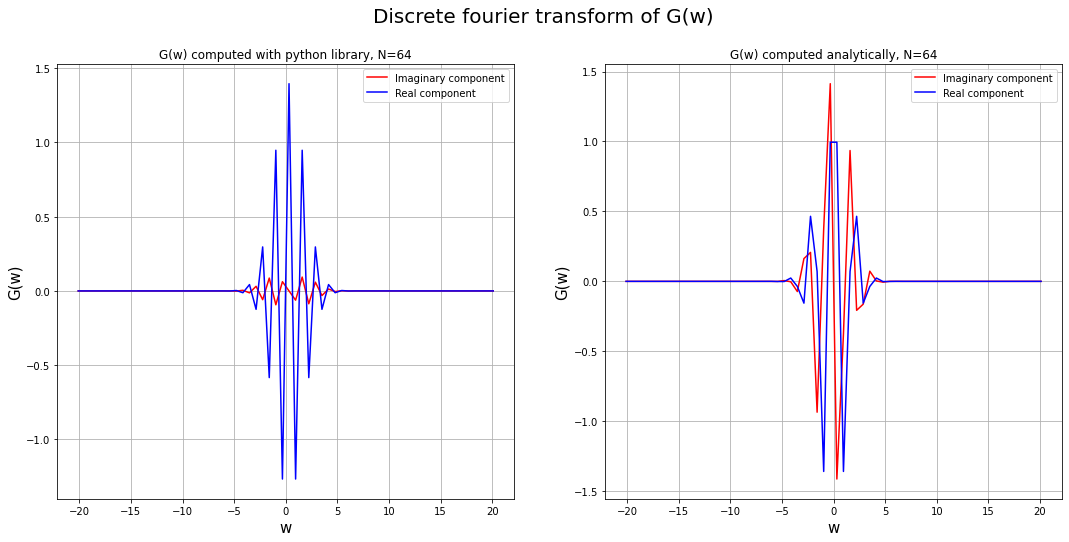

In [ ]:
data = {'freq': omega[-1], 'real': [G_python[-1].real, G_formula[-1].real] , 
        'imag':[G_python[-1].imag, G_formula[-1].imag], 
        'label':["G(w) computed with python library, N=64", "G(w) computed analytically, N=64"], 
        'title':"Discrete fourier transform of G(w)",
        'ylabel':"G(w)", 'xlabel':"w"}
graph(data)
#Graph 1

For some reason the imaginary part of $G(\omega)$ that we get through the use of python library is too small compare with analytical solution. I haven't succeded in solving the issue. The problem could in a different way of calulating the fourier transform (it could do it with different formula or spacing). For real component function seems to work fine. If we will use result for $G(\omega)$ computed with python library, we can face some issues with imaginary component.


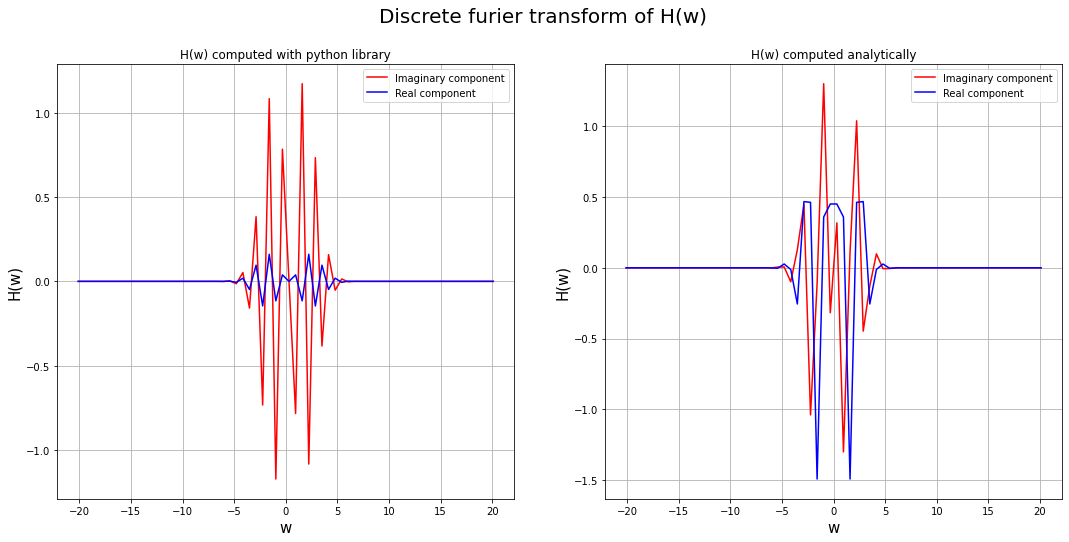

In [ ]:
data = {'freq': omega[-1], 'real': [H_python[-1].real, H_formula[-1].real] , 
        'imag':[H_python[-1].imag, H_formula[-1].imag], 
        'label':["H(w) computed with python library", "H(w) computed analytically"], 
        'title':"Discrete furier transform of H(w)",
        'ylabel':"H(w)", 'xlabel':"w"}
graph(data)
#Graph 2

Overall the behaviour of two functions is similar, but still the result of python library is not accurate. I would like to conclude how $N$ influence the overall disrepancy in results between python library and analytical approach.

###Part 3 – Discrepancy of the solution

Now, we have sets of descretized $G(\omega)$ and $H(\omega)$ calculated with analytical formula and genereted with python library. I will judge how the disrepancy changes with increasing $N$ by calculting mean modulus for each set:
$$error = \frac{1}{n}\sum^n_{k=1}|F(\omega)-F'(\omega)|$$
where $F(\omega)$ is descretized fourier transform calculated analytically and $F'(\omega)$ is descretized fourier transform calculated with `scipy.fft`:

In [ ]:
def discrepancy(measured, theory):
  err = []
  for x, y in zip(measured, theory):
    err.append(np.mean(np.abs(y-x)))
  return err

In [ ]:
#store values for discrepancy of G(w), H(w)
err_G = discrepancy(G_python, G_formula)
err_H = discrepancy(H_python, H_formula)

I will plot the graph to see how the discrepancy changes with increasing $N$:

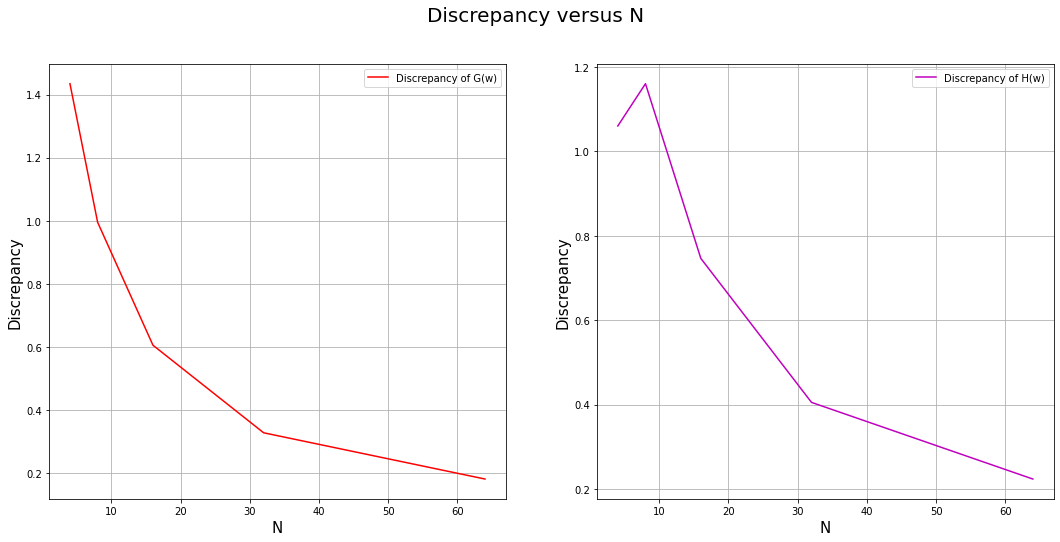

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(18,8))
fig.suptitle("Discrepancy versus N", fontsize=20) 

#graph settings
for ax in axs:
  ax.set_xlabel("N",  fontsize=15)
  ax.set_ylabel("Discrepancy",  fontsize=15)
  ax.grid()

#plot the graphs
axs[0].plot(N, err_G, c='r', label="Discrepancy of G(w)")
axs[1].plot(N, err_H, c='m', label="Discrepancy of H(w)")

axs[0].legend()
axs[1].legend()
plt.show()
#Graph 3

From this graph we can conclude that with increasing number of data points the discrepancy changes almost polinomially. Even with maximum $N=64$ the discrepancy has not converged to global minimum. 

###Part 4 – Confirmation of some Fourier transformation's features 

In the first part, I have already mentioned that analytical formulas for $G(\omega)$ and $H(\omega)$ differ only by factor of $i\omega$.
$$H(\omega)=i\omega G(\omega)$$

The inverse of fourier transformation can be calculated using formula:

$$f(t)=\frac{1}{2\pi}\int_{-\infty}^{\infty} F(\omega)e^{i\omega t}dt$$

Let me write formula for $h(t)$:
$$h(t)=\frac{1}{2\pi}\int_{-\infty}^{\infty} H(\omega)e^{i\omega t}dt = \frac{1}{2\pi}\int_{-\infty}^{\infty} i\omega G(\omega)e^{i\omega t}dt $$

So, if we find inverse Fourier transformation of $i\omega G(\omega)$, we should get $h(t)$. The python library `scipy.fft `also has function for inverse fft:

In [ ]:
h_ifft = [ifft(ifftshift(g_0*omega_0*1j), norm='ortho') for g_0, omega_0 in zip(G_python, omega)]

So, now we have result stored for inverse $i\omega G(\omega)$ stored in `h_ifft` variable and I forecast that these values should be similar or equal to original h(t). To test this hypothesis, I at first will plot a graph with both real and imagenary components using the same function `graph(data)` that I have used in the Part – 2:

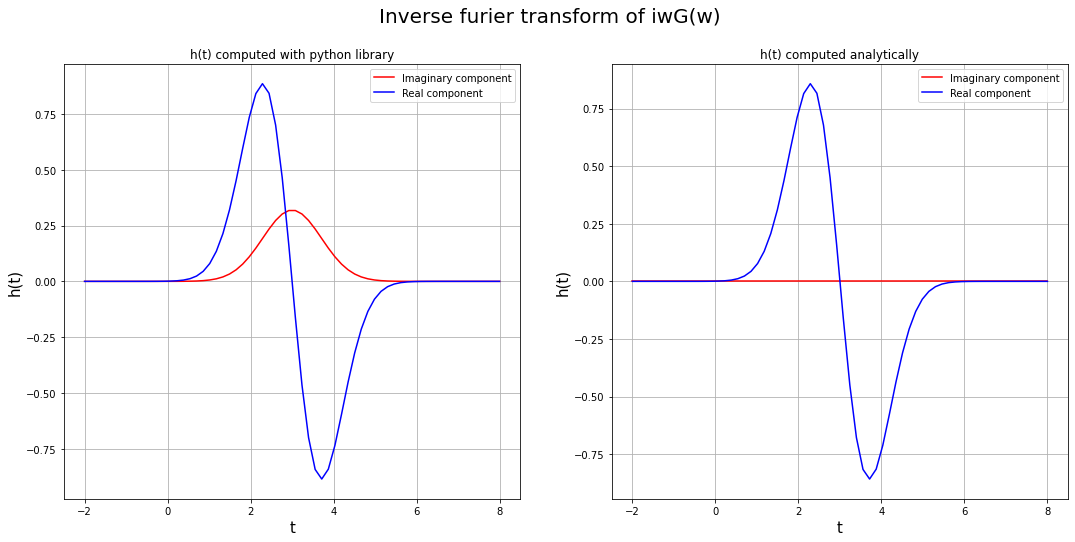

In [ ]:
data = {'freq': t[-1], 'real': [h_ifft[-1].real, h[-1].real] , 
        'imag':[h_ifft[-1].imag, h[-1].imag], 
        'label':["h(t) computed with python library", "h(t) computed analytically"], 
        'title':"Inverse furier transform of iwG(w)",
        'ylabel':"h(t)", 'xlabel':"t"}
graph(data)
#Graph 4

This graph clearly demonstrates that $h(t)$ can be computed through inverse fourier transformation of $i\omega G(\omega)$ as two graphs are very similar. But as it has been noted before, there are some issues with imaginary part for some reason it is not zero. 

We can judge how well we can approximate the $h(t)$ with increasing $N$ by comparing the discrepancy as we did in the previous parts:

In [ ]:
#calculate erorr for h
err_h = discrepancy(h_ifft, h)

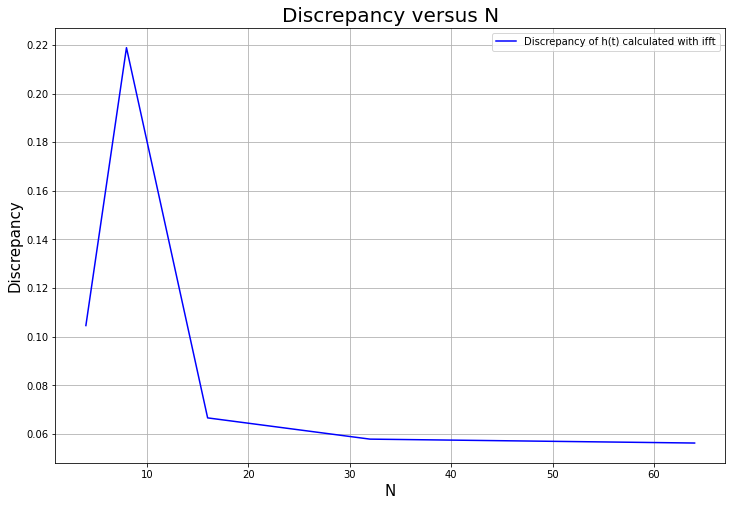

In [ ]:
fig, axs = plt.subplots(figsize=(12,8))
plt.title("Discrepancy versus N", fontsize=20) 

#graph settings
axs.set_xlabel("N",  fontsize=15)
axs.set_ylabel("Discrepancy",  fontsize=15)

#plot the graphs
axs.plot(N, err_h, c='b', label="Discrepancy of h(t) calculated with ifft")

plt.grid()
plt.legend()
plt.show()

#Graph 5

The discrepancy of $h(t)$ seems to converge to global minimum. It could demonstrated much better results, since the main contributor to error is the imaginary part. Lets repeat the same procedure with the real part only:

In [ ]:
def discrepancy_real(measured, theory):
  err = []
  for x, y in zip(measured, theory):
    err.append(np.mean(np.abs(y.real-x.real)))
  return err
#calculate erorr for h
err_h_real = discrepancy_real(h_ifft, h)

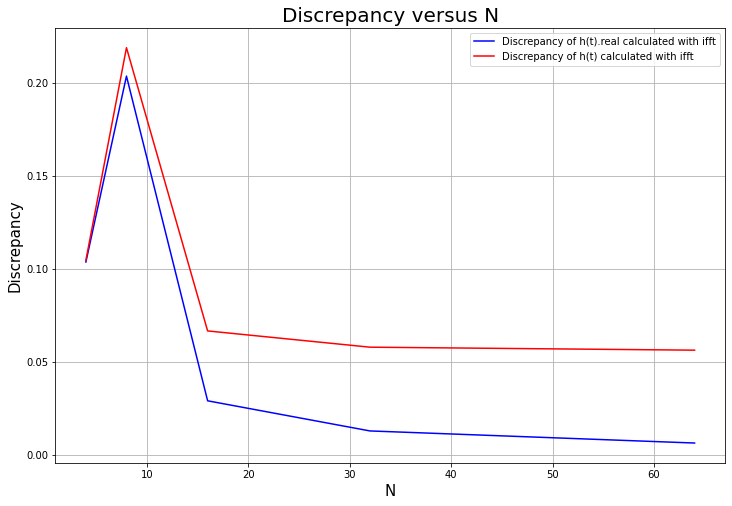

In [ ]:
fig, axs = plt.subplots(figsize=(12,8))
plt.title("Discrepancy versus N", fontsize=20) 

#graph settings
axs.set_xlabel("N",  fontsize=15)
axs.set_ylabel("Discrepancy",  fontsize=15)

#plot the graphs
axs.plot(N, err_h_real, c='b', label="Discrepancy of h(t).real calculated with ifft")
axs.plot(N, err_h, c='r', label="Discrepancy of h(t) calculated with ifft")

plt.grid()
plt.legend()
plt.show()

#Graph 6

From Graph #6 it should be clear right now that the main contributor to discrepancy is the imaginary component of $h(t)$. For some reason the calculated $G(\omega)$ with python linbrary is incorrect. This requires some further studies.

---
##Conclusion

In this programming assignmnet we get introduced with discreted fourier transformation in two ways: using analytical formula and python library. We have conlcuded that with greater number of $N$ we can decrease the value of discrepancy between theoretical and approximate fourier transformation. On practice, we proved that it is not always the best choice to use functions from python libraries since we don't know exactly what they are doing or don't have a control over them. In the Part – 2 we see that functions have similar behaviours, but the individual real and imaginary components are too different. This fact affected the result of the last part of the experiment and I didn't succeded in approximation of $h(t)$.

It is a pity that in this programming assignment we haven't tested the real-life application of Fourier transformation. For example, with a sound. Since with some abstract functions it is not always possible how well we did fourier transform. But if we work with real sound or picture after editing with FFT, we clearly could see the difference. So, in the future it would be better to use some sound instead of a simple gaussian function.

After completing this laboratory, now I have a base idea of how the fourier transformation acts and what kind of output it produces. So, that it could be easier for me to decide in future in what kind of problems I can apply this alghorithm.